#### Problem statement
Using clustering algorithms to categorize similar players using their traits and their different skills in the field.


#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading data

In [2]:
df=pd.read_csv('players_20.csv')
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


#### Inspecting the data

In [3]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [4]:
#getting the list of all columns in datset
df.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

#### EDA

In [5]:
#finding the datatypes of all the features in the dataset 
dtype_dict =dict(df.dtypes) 
print('Data type of each column of Dataframe :')
print(dtype_dict)

Data type of each column of Dataframe :
{'sofifa_id': dtype('int64'), 'player_url': dtype('O'), 'short_name': dtype('O'), 'long_name': dtype('O'), 'age': dtype('int64'), 'dob': dtype('O'), 'height_cm': dtype('int64'), 'weight_kg': dtype('int64'), 'nationality': dtype('O'), 'club': dtype('O'), 'overall': dtype('int64'), 'potential': dtype('int64'), 'value_eur': dtype('int64'), 'wage_eur': dtype('int64'), 'player_positions': dtype('O'), 'preferred_foot': dtype('O'), 'international_reputation': dtype('int64'), 'weak_foot': dtype('int64'), 'skill_moves': dtype('int64'), 'work_rate': dtype('O'), 'body_type': dtype('O'), 'real_face': dtype('O'), 'release_clause_eur': dtype('float64'), 'player_tags': dtype('O'), 'team_position': dtype('O'), 'team_jersey_number': dtype('float64'), 'loaned_from': dtype('O'), 'joined': dtype('O'), 'contract_valid_until': dtype('float64'), 'nation_position': dtype('O'), 'nation_jersey_number': dtype('float64'), 'pace': dtype('float64'), 'shooting': dtype('float64

In [6]:
#finding the number of player positions
df.player_positions.value_counts()

CB              2322
GK              2036
ST              1809
CM               786
CDM, CM          731
                ... 
CDM, LWB, CM       1
CF, LM, LW         1
CDM, LM, CM        1
RM, ST, RB         1
CAM, LB            1
Name: player_positions, Length: 643, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [8]:
df.shape

(18278, 104)

#### Visualising the distribution of Height, Weight, Age features

<AxesSubplot:xlabel='age', ylabel='Count'>

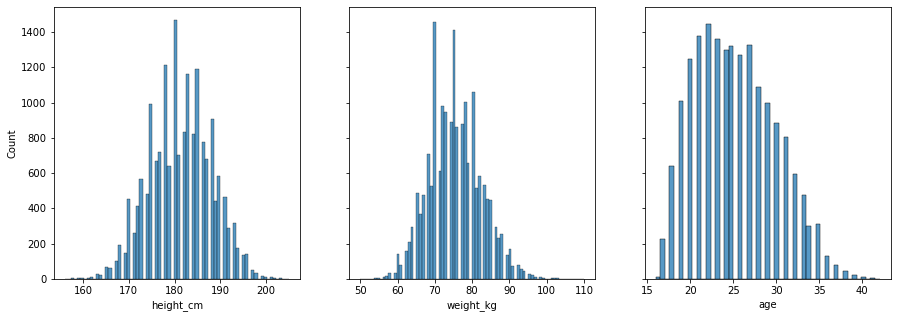

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.histplot(df,ax=axes[0], x="height_cm")
sns.histplot(df,ax=axes[1], x="weight_kg")
sns.histplot(df,ax=axes[2], x="age")

Note:
** Most of the players are distributed in height rannging between 170-190cm
** Most of the players are distributed in weight between 70-90kg
** Most of the players are aged between 20-35 years.

#### Visualising the relationship between Age vs Wage

Text(0.5, 1.0, 'Wage vs age')

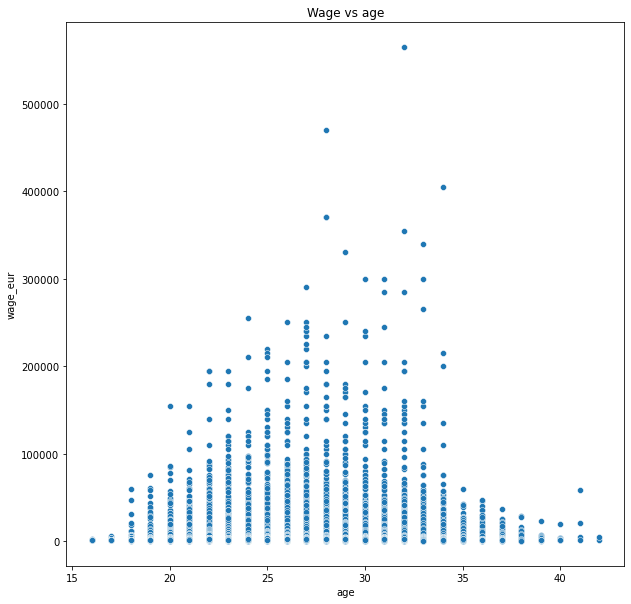

In [10]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="age", y="wage_eur").set_title("Wage vs age")

Note:Players between the age 20-35 seem to earn more compared to other age groups

#### Prefered foot

<AxesSubplot:xlabel='preferred_foot', ylabel='count'>

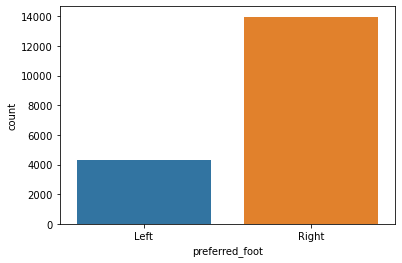

In [11]:
sns.countplot(x='preferred_foot',data=df)

Note:Most of the players seem to use right foot.

##### Analysing effect of BMI on players

In [12]:
df['bmi'] = df['weight_kg'] // (df['height_cm']/100)**2

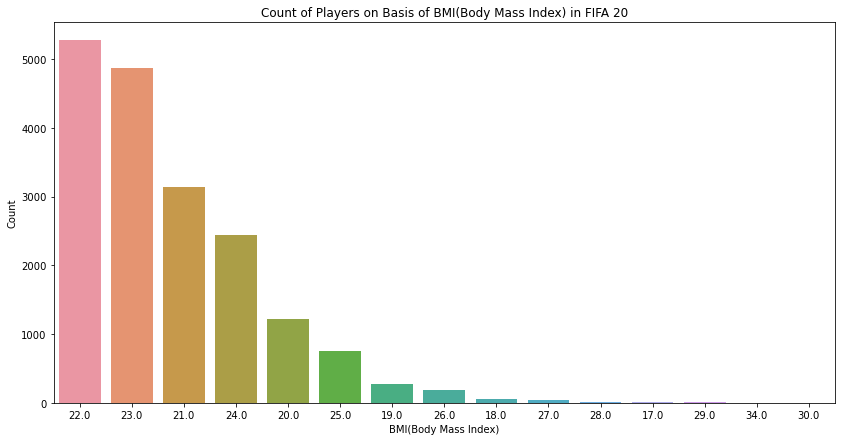

In [13]:
plt.figure(figsize= (14, 7))

ax = sns.countplot(x='bmi', data=df, order=df.bmi.value_counts().iloc[:20].index)
ax.set_title(label='Count of Players on Basis of BMI(Body Mass Index) in FIFA 20')

ax.set_xlabel(xlabel='BMI(Body Mass Index)')
ax.set_ylabel(ylabel='Count')

plt.show()

Note:22 seems to be the most common BMI.

#### Visualising players and their Nationalities

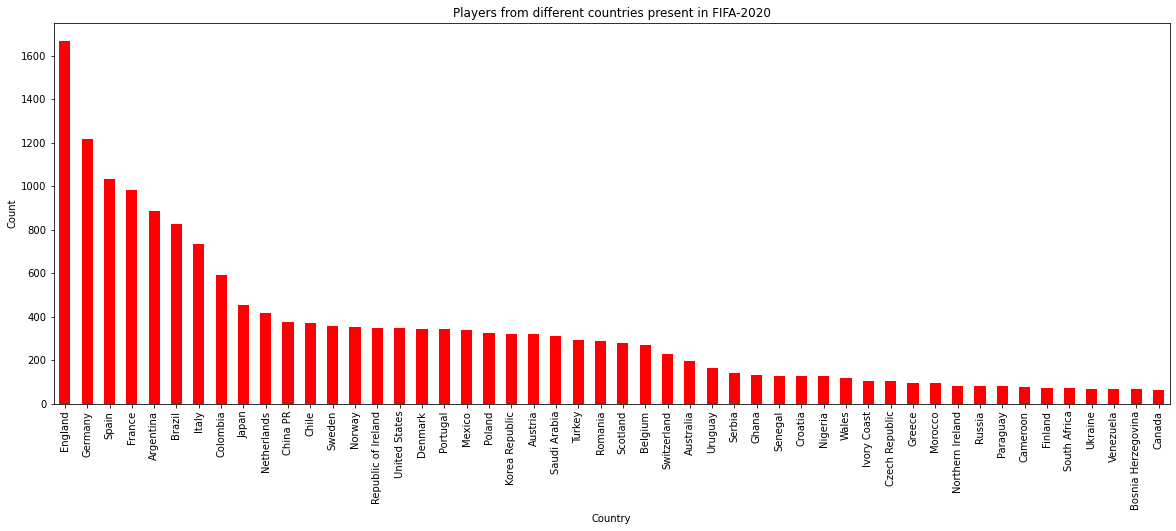

In [14]:
plt.figure(figsize = (20,7))
df['nationality'].value_counts().head(50).plot.bar(color = 'red')
plt.title('Players from different countries present in FIFA-2020')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Note: England seems to have the highest number of soccer player with Germany having the second highest and Spain having the third highest, Canada,Venezuela,Bosnia Herzgovina seem to have the least number of players

In [15]:
#making a copy of origina dataset
df1=df.copy()

In [16]:
df1=df.drop(['player_traits','team_position','player_tags','player_positions','preferred_foot',
              'work_rate','body_type','release_clause_eur','pace','passing','dribbling','sofifa_id','player_url','long_name','age','dob','height_cm','weight_kg','nationality',
             'club','real_face','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position','nation_jersey_number','ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
             'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'], axis=1)


In [17]:
df1.head()

,short_name,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,shooting,defending,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi
0,L. Messi,94,94,95500000,565000,5,4,4,92.0,39.0,...,96,33,37,26,6,11,15,14,8,24.0
1,Cristiano Ronaldo,93,93,58500000,405000,5,4,5,93.0,35.0,...,95,28,32,24,7,11,15,14,11,23.0
2,Neymar Jr,92,92,105500000,290000,5,5,5,85.0,32.0,...,94,27,26,29,9,9,15,15,11,22.0
3,J. Oblak,91,93,77500000,125000,3,3,1,NaN,NaN,...,68,27,12,18,87,92,78,90,89,24.0
4,E. Hazard,91,91,90000000,470000,4,4,4,83.0,35.0,...,91,34,27,22,11,12,6,8,8,24.0


In [18]:
df1.shape

(18278, 52)

#### Finding the null values

In [19]:
df1.isnull().sum()

short_name                        0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
international_reputation          0
weak_foot                         0
skill_moves                       0
shooting                       2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_positioning                16242
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration       

#### Cleaning data

In [20]:
df1=df1.fillna(df.mean())

In [21]:
pd.isnull(df1).sum().head(51)

short_name                    0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
shooting                      0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement

In [22]:
df1.shape

(18278, 52)

In [23]:
df1.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves', 'shooting',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_di

In [24]:
df2=df1[df1.describe().columns]

#### PCA-Principal component analysis
Scaling the data before perfoming PCA, by performing the PCA data is transformed into unit scale (mean = 0 and variance = 1) for better performance. 

In [25]:
from sklearn.preprocessing import MinMaxScaler
x=df2.values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [26]:
X = pd.DataFrame(data=x_scaled, columns=df1.describe().columns)
X.head()

,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,shooting,defending,physic,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi
0,1.000000,0.978261,0.905213,1.000000,1.00,0.75,0.75,0.987179,0.320000,0.619048,...,1.000000,0.344086,0.367816,0.264368,0.056180,0.109890,0.152174,0.144444,0.076923,0.411765
1,0.978261,0.956522,0.554502,0.716814,1.00,0.75,1.00,1.000000,0.266667,0.809524,...,0.988095,0.290323,0.310345,0.241379,0.067416,0.109890,0.152174,0.144444,0.109890,0.352941
2,0.956522,0.934783,1.000000,0.513274,1.00,1.00,1.00,0.897436,0.226667,0.492063,...,0.976190,0.279570,0.241379,0.298851,0.089888,0.087912,0.152174,0.155556,0.109890,0.294118
3,0.934783,0.956522,0.734597,0.221239,0.50,0.50,0.00,0.478183,0.487380,0.601217,...,0.666667,0.279570,0.080460,0.172414,0.966292,1.000000,0.836957,0.988889,0.967033,0.411765
4,0.934783,0.913043,0.853081,0.831858,0.75,0.75,0.75,0.871795,0.266667,0.619048,...,0.940476,0.354839,0.252874,0.218391,0.112360,0.120879,0.054348,0.077778,0.076923,0.411765


In [27]:
X.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves', 'shooting',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       

#### Exploratory data analysis

<AxesSubplot:>

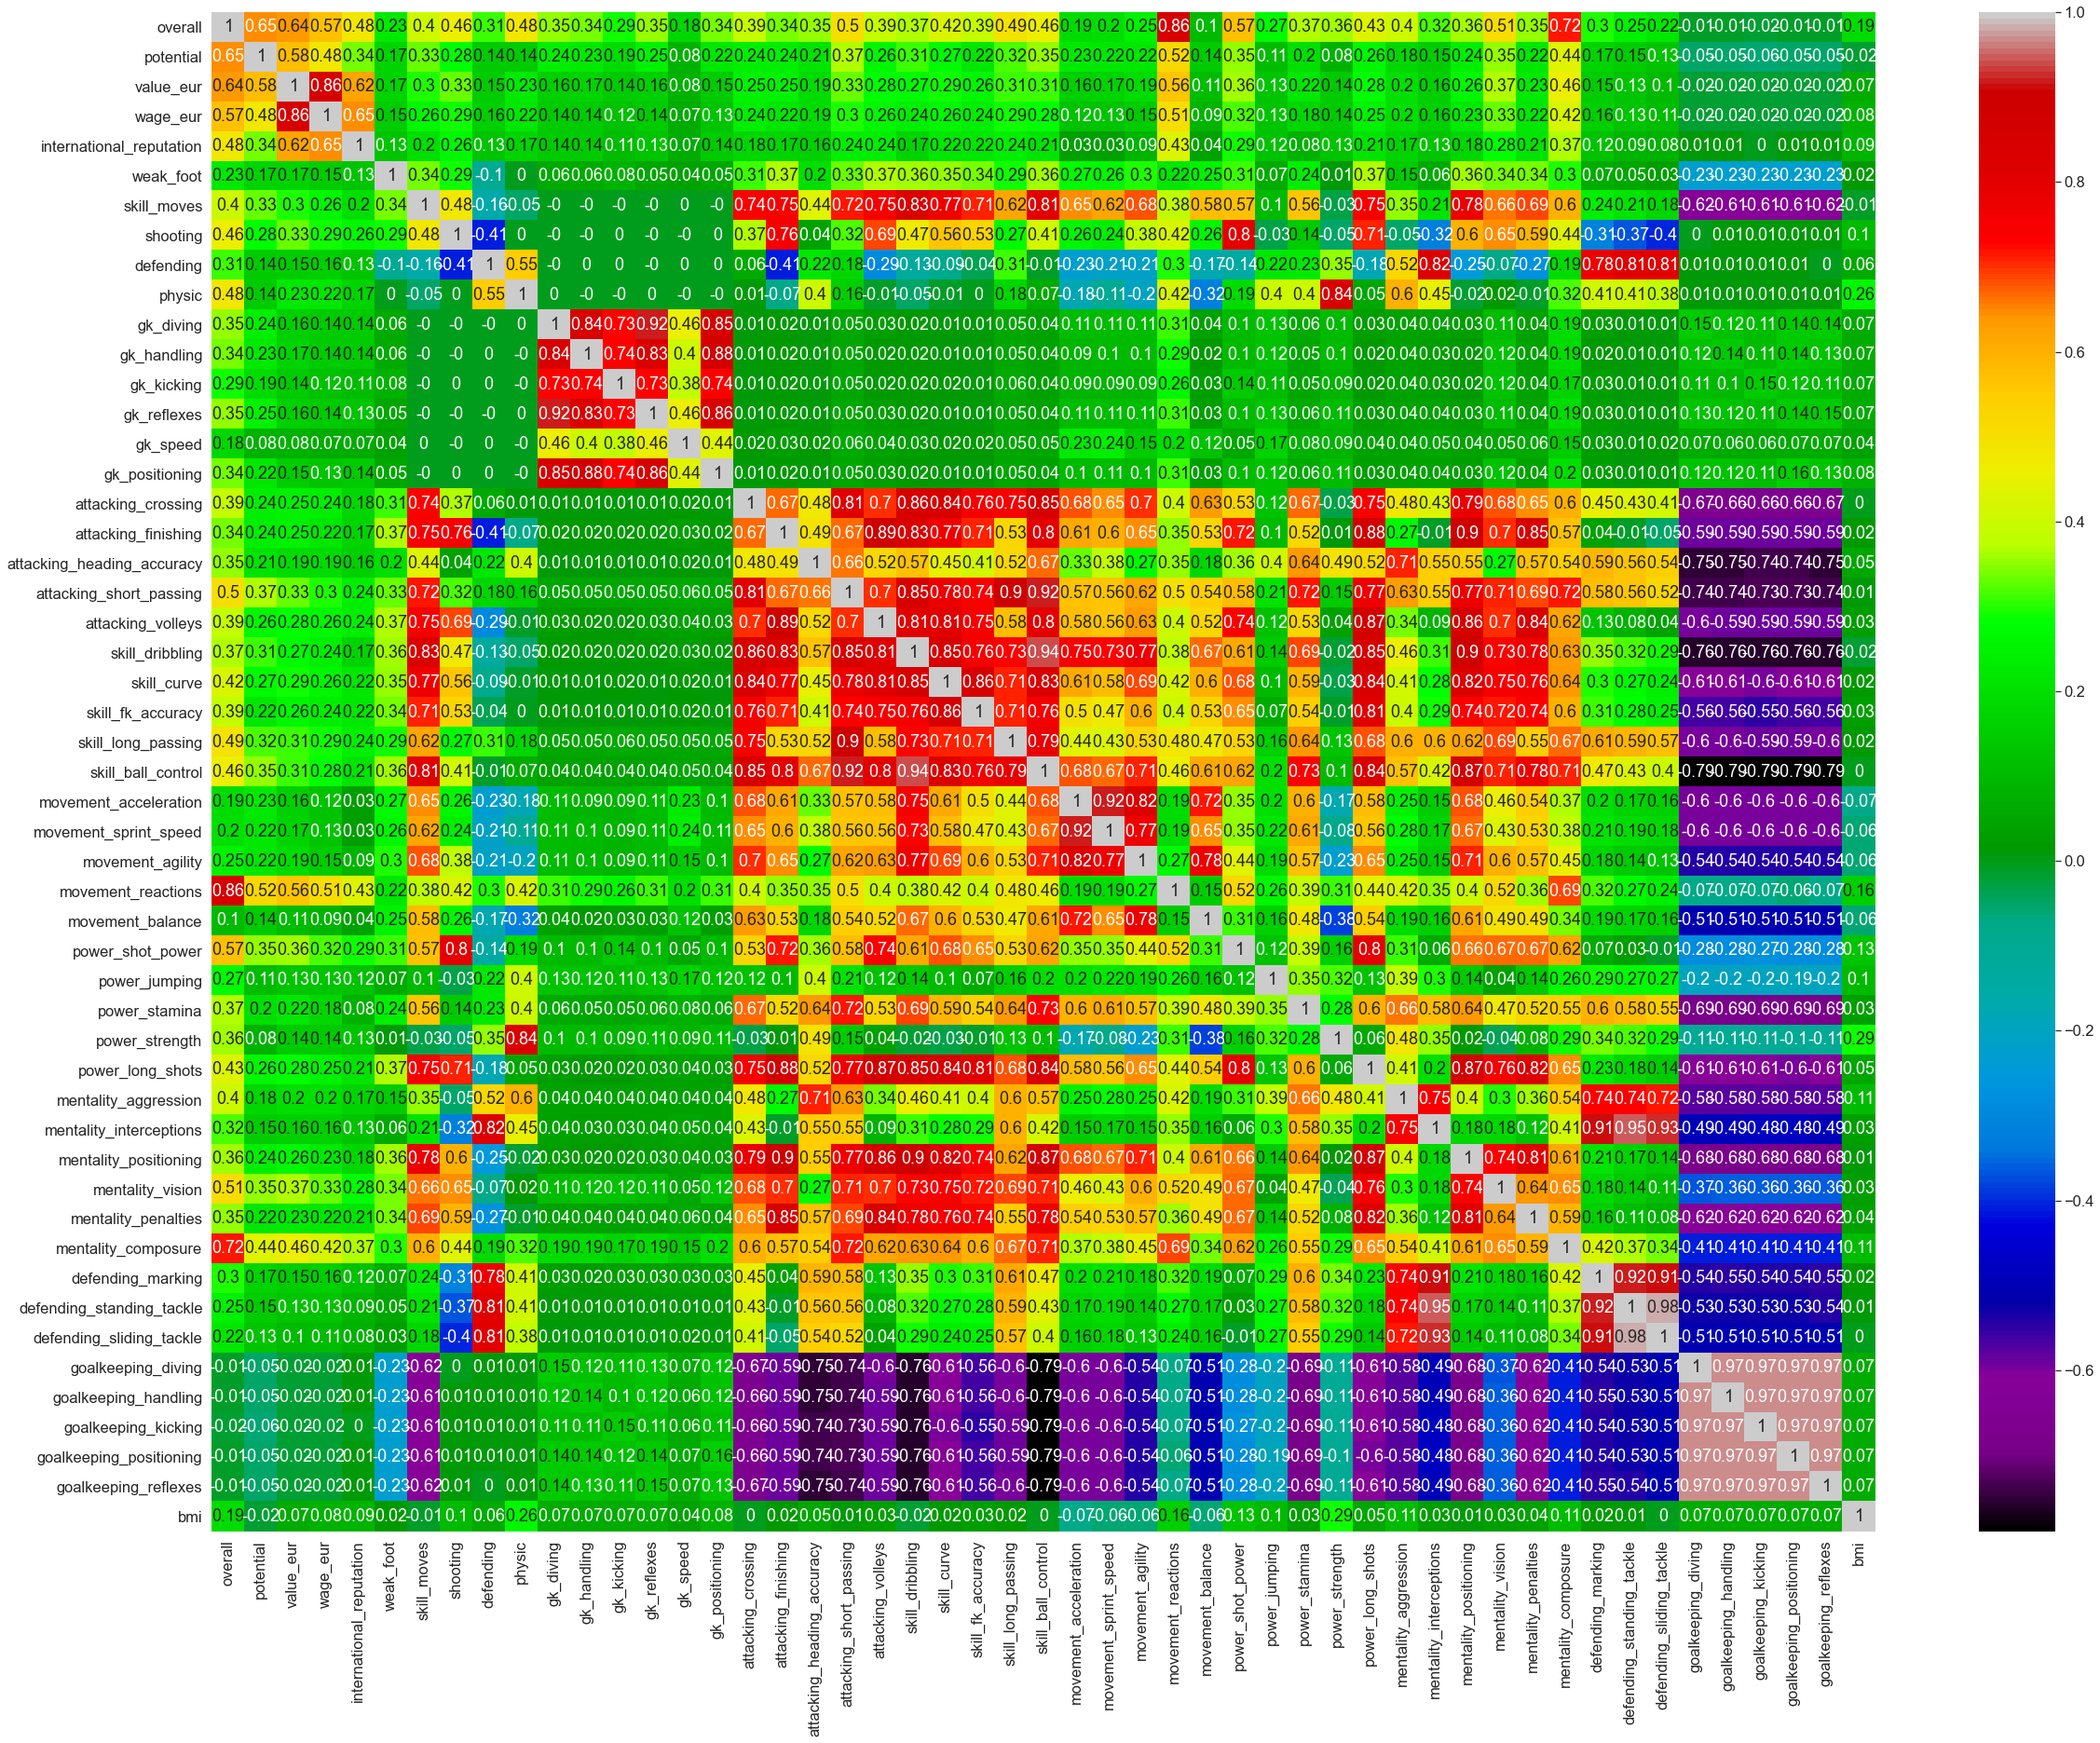

In [28]:
#correlation
plt.figure(figsize=[40,30])
corr = X.corr().round(2)
sns.set(font_scale=1.5)
sns.heatmap(data=corr, cmap="nipy_spectral", annot=True)

#### Visualising the outliers in X through Boxplots

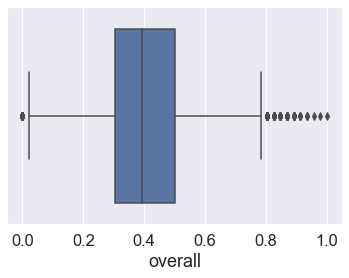

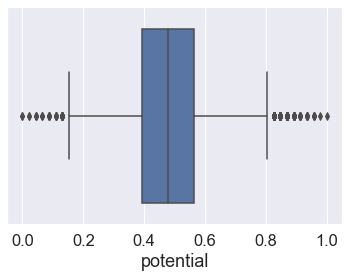

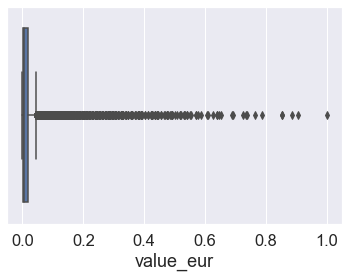

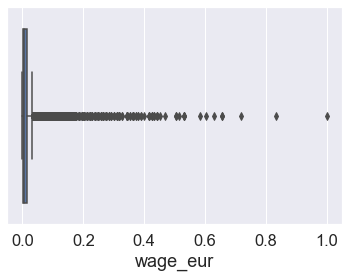

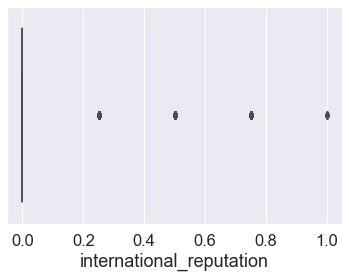

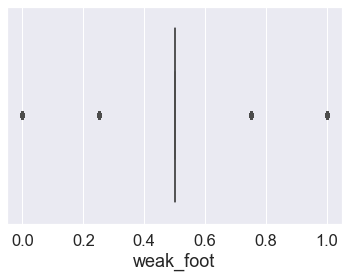

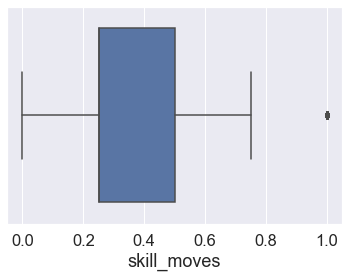

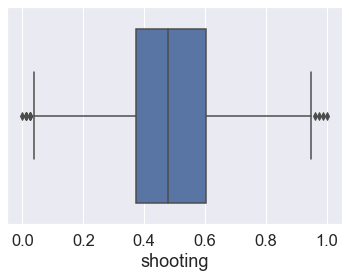

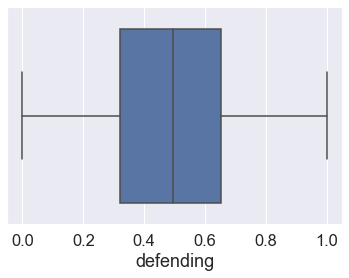

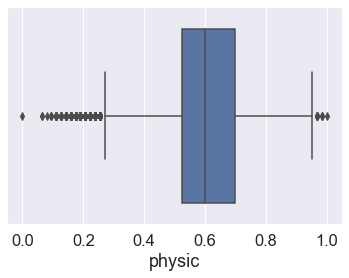

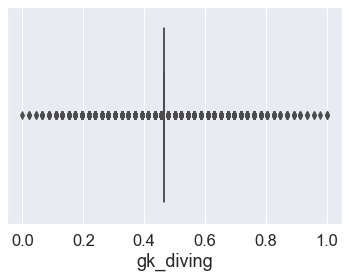

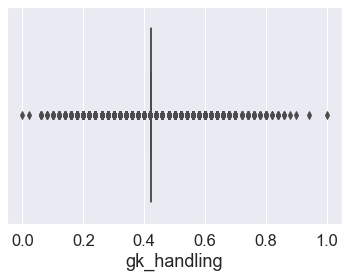

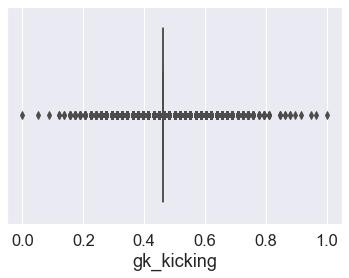

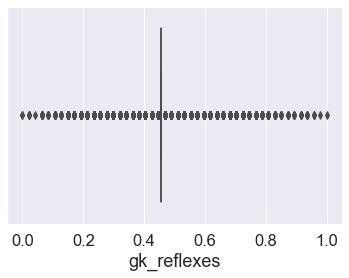

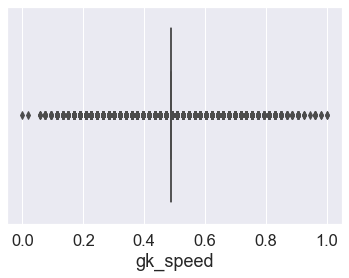

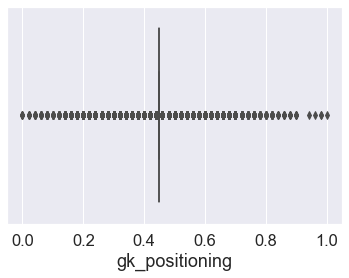

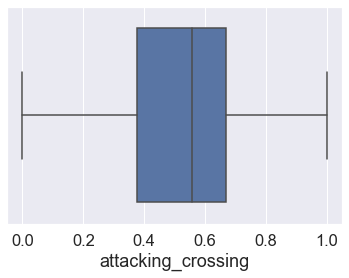

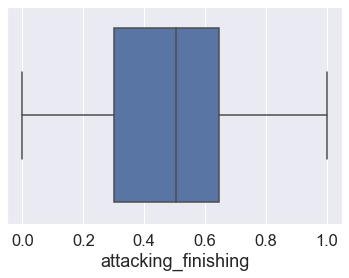

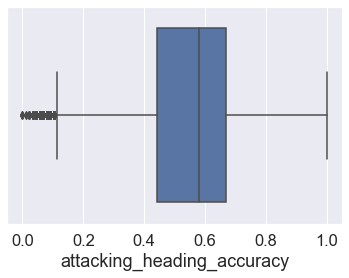

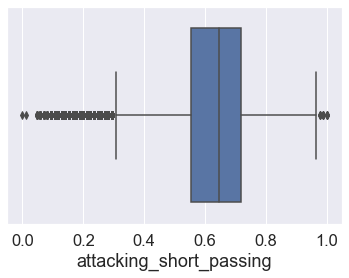

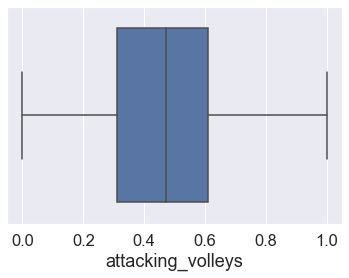

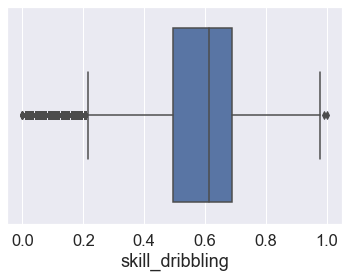

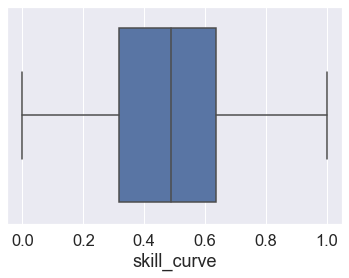

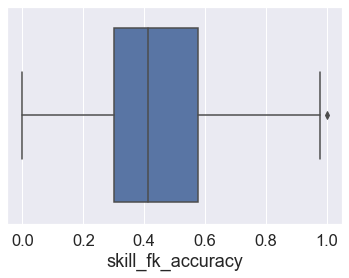

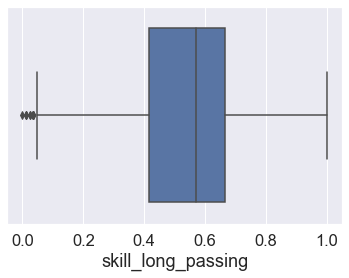

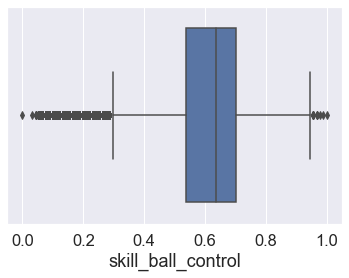

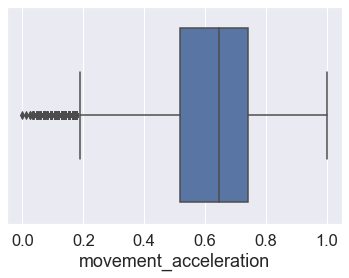

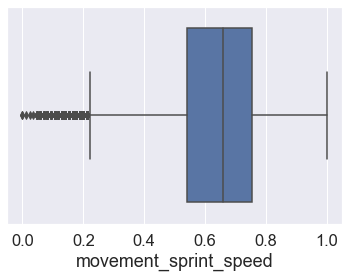

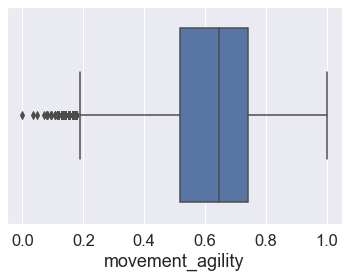

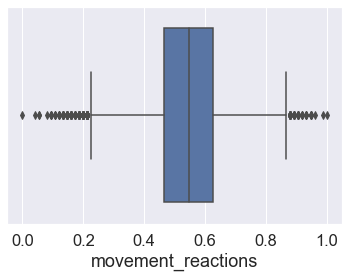

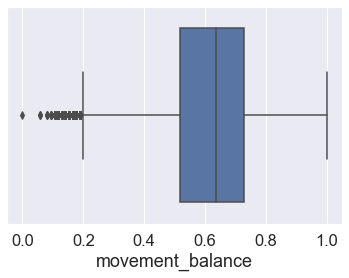

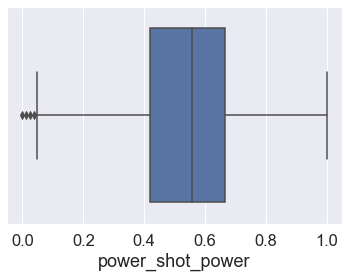

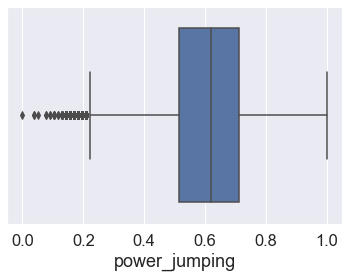

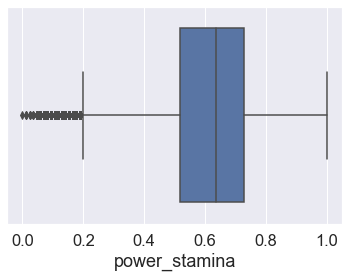

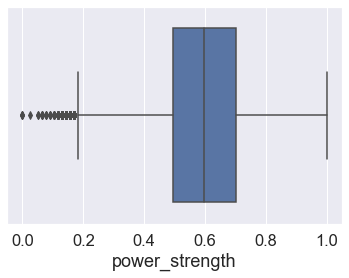

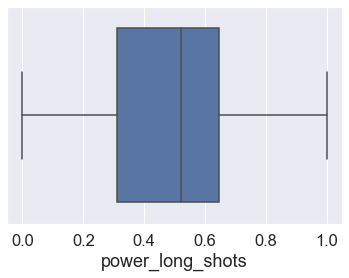

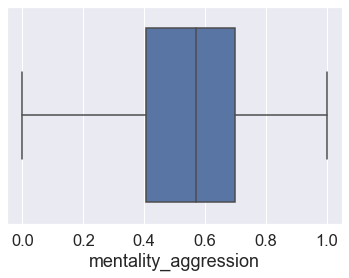

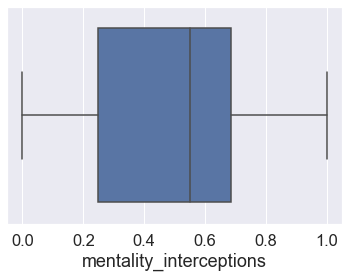

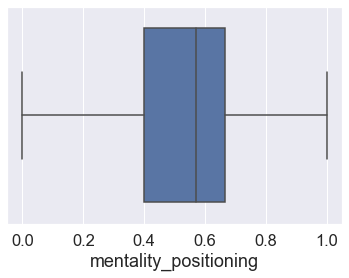

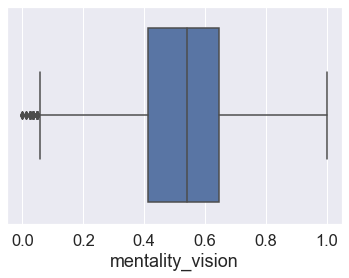

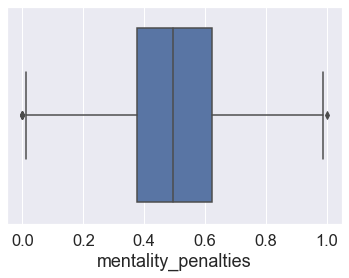

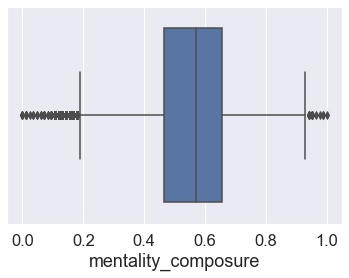

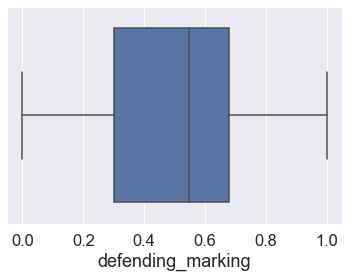

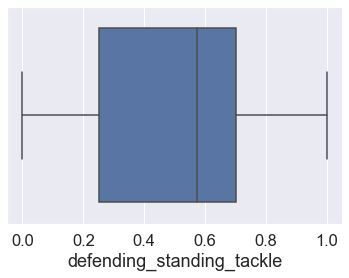

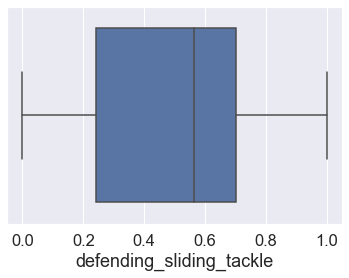

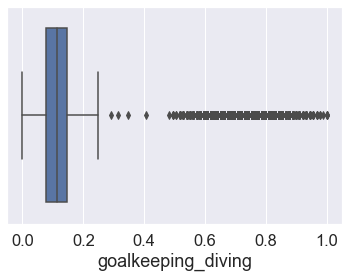

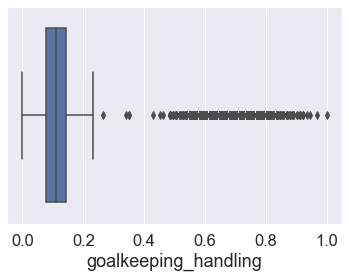

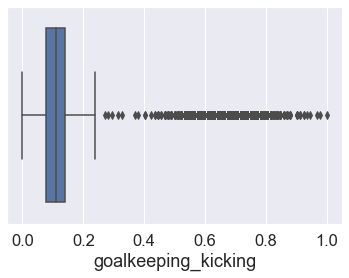

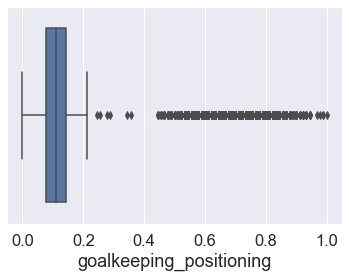

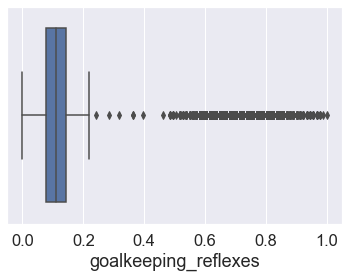

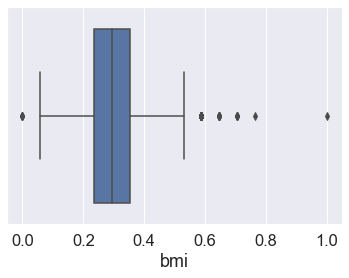

In [29]:
#Visualising each column of X through boxplots
for col in X.columns:
    sns.boxplot(x = col, data = X) 
    plt.show()

**Features like 
defending_sliding_tackle,defending_standingtackle,defending_marking,mentality_penalties,mentality_positioning,mentality_vision,mentality_interceptions,mentality_aggression,power_shot_power,power_long_shots have little to no outliers.

**Features like gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,value_eur,wage_eur,international_reputation,weak_foot have more outliers

In [30]:
X1 = X.copy()
X1["short_name"] = df1["short_name"]

X2 = X1.drop(columns="short_name", axis=1)

for col in X.columns:
    sns.boxplot(x = col, data = 1) 
    plt.show()

In [31]:
# Tranforming training data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df1 = pd.DataFrame(pca.fit_transform(X2))

#### Kmeans algorithm
K-Means clustering is one of the clustering algorithms.
The goal is to form the clusters in a way that the observations within the same cluster are as similar as possible.
K-Means clustering calculates similarity using Squared Euclidean distance.

In [32]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=1)

kmeans = kmeans.fit(pca_df1)
labels = kmeans.predict(pca_df1)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

print("Silhouette Score:",silhouette_score(pca_df1, labels).round(3))

Silhouette Score: 0.458


#### Visualising PCA projection

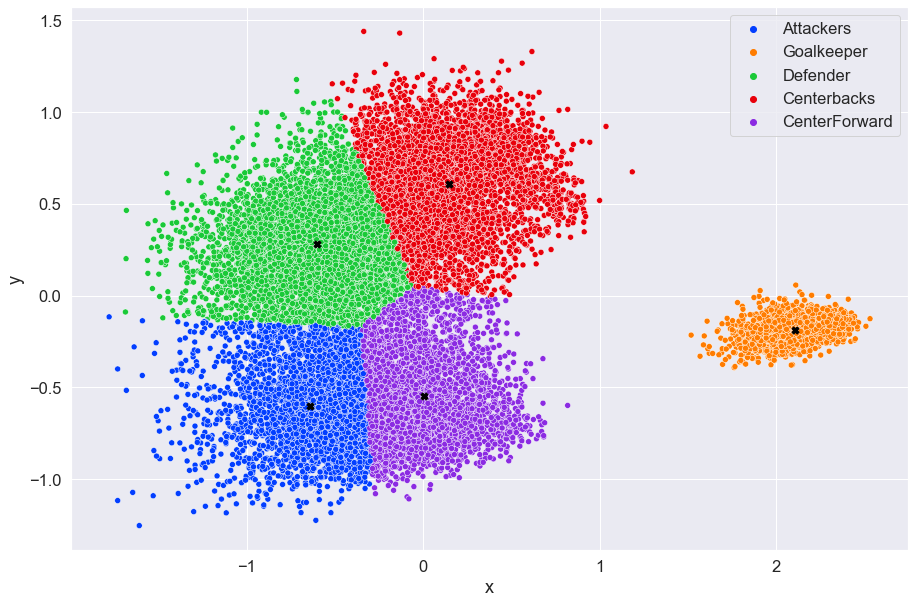

In [33]:
#plot
pca_df1["cluster"] = clusters
pca_df1['name'] = X1["short_name"]
cluster_mapping = {0:"Defender",1:"Goalkeeper",2:"CenterForward",3:"Centerbacks",4:"Attackers"}
pca_df1["ClusterName"] = pca_df1["cluster"].map(cluster_mapping)

pca_df1.columns = ['x','y','cluster','name','ClusterName']

#scatterplot
plt.figure(figsize=[15,10])
sns.scatterplot(data=pca_df1, x='x', y='y', hue='ClusterName', palette='bright')
plt.legend(loc='upper right')
plt.scatter(centroid[:,0], centroid[:,1], marker="X",s=50,c="black")

In [34]:
#pca_df1[['cluster','ClusterName','name']].head()
pca_df1[pca_df1["cluster"]==2][['name','ClusterName']]

,name,ClusterName
1765,L. Ajorque,CenterForward
1767,V. Muriqi,CenterForward
2214,H. Diallo,CenterForward
2379,G. Blanco Leschuk,CenterForward
2800,Marcão,CenterForward
...,...,...
18258,L. Collins,CenterForward
18261,H. Shirai,CenterForward
18266,Wang Peng,CenterForward
18268,M. Gallagher,CenterForward


Note:from the graph we can identify that the goalies are clearly segregated from the rest of the players 

In [35]:
pca_df1.head()

,x,y,cluster,name,ClusterName
0,-1.731230,-1.116745,4,L. Messi,Attackers
1,-1.645968,-1.072230,4,Cristiano Ronaldo,Attackers
2,-1.608883,-1.253099,4,Neymar Jr,Attackers
3,1.874253,-0.206576,1,J. Oblak,Goalkeeper
4,-1.530027,-1.090585,4,E. Hazard,Attackers


In [36]:
names=df1.short_name.tolist()

#### Now players with overall > 80 in the Fifa20 dataset are considered for clustering

In [37]:
X3 = X.copy()
X3["short_name"] = names
X3 = X3[X3.overall>0.80]
X4 = X3.drop(columns="short_name", axis=1)

In [38]:
#X3["short_name"]

In [39]:
X4.shape

(108, 51)

In [40]:
#Transforming training data using PCA

A silhouette score is a value in [-1,+1]. It is a means for comparing how similar an instance is to its corresponding cluster compared to its similarity with other clusters. Formally, it takes into account cohesion and separation to compute a silhouette value. A +1 or close to this score value indicates better clusters.

The explained variance tells us how much information (variance) can be attributed to each of the principal components. This is important as data is converted from multidimensional space to 2 dimensional space, some of the variance (information) is lost.

In [41]:
pca = PCA(n_components=2)
pca_df2 = pd.DataFrame(pca.fit_transform(X4))

#kmeans
kmeans = KMeans(n_clusters=5, random_state=1)

kmeans = kmeans.fit(pca_df2)
labels = kmeans.predict(pca_df2)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

print("Silhouette Score:",silhouette_score(pca_df2, labels).round(3))
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Sum of Explained variance ratio:', sum(pca.explained_variance_ratio_))

Silhouette Score: 0.599
Explained variance ratio: [0.61186881 0.21096616]
Sum of Explained variance ratio: 0.8228349723708264


**Here the silhouette score is 0.599 which is close to +1, we can say that Kmeans will give fairly good clusters,Scores around zero indicate overlapping clusters.

**For the Explained variance ratio Together, the two principal components contain about 83% of the information. The first principal component contains about 61% of the variance. The second principal component contains about 21% of the variance.

#### Visualising PCA projection

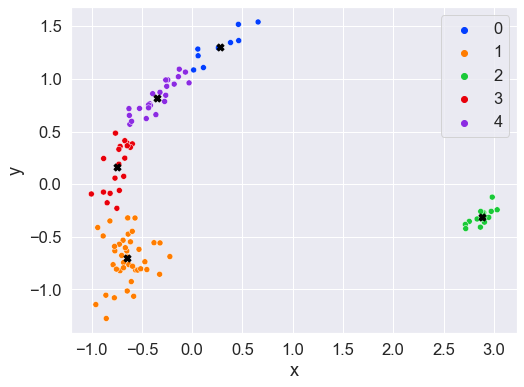

In [42]:
#Plot
pca_df2["cluster"] = clusters
pca_df2['name'] = X3["short_name"]


pca_df2.columns = ['x','y','cluster','name']

#scatterplot
plt.figure(figsize=[8,6])
sns.scatterplot(data=pca_df2, x='x', y='y', hue='cluster', palette='bright')
plt.legend(loc='upper right')
plt.scatter(centroid[:,0], centroid[:,1], marker="X",s=50,c="black")

Note:From the graph the goalies are well seperated from the rest of the players

In [43]:
pca_df2.head()
#pca_df2.columns

,x,y,cluster,name
0,-0.957090,-1.143506,1,L. Messi
1,-0.857431,-1.054762,1,Cristiano Ronaldo
2,-0.853749,-1.275781,1,Neymar Jr
3,2.949434,-0.315477,2,J. Oblak
4,-0.773074,-1.079435,1,E. Hazard


#### Heirarchical clistering

**Unlike K-means, Heirachical clustering doesnot need number of clusters specification.
**Results are summarized in a dendrogram, a tree-like plot that allows easy interpretation of data and choosing any number of clusters

#### Chosing the player with overall>86 from the dataset for better visualization purpose

In [44]:
df3=df1.copy()
df3=df3[df3.overall>86]
df3.head()

,short_name,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,shooting,defending,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi
0,L. Messi,94,94,95500000,565000,5,4,4,92.000000,39.000000,...,96,33,37,26,6,11,15,14,8,24.0
1,Cristiano Ronaldo,93,93,58500000,405000,5,4,5,93.000000,35.000000,...,95,28,32,24,7,11,15,14,11,23.0
2,Neymar Jr,92,92,105500000,290000,5,5,5,85.000000,32.000000,...,94,27,26,29,9,9,15,15,11,22.0
3,J. Oblak,91,93,77500000,125000,3,3,1,52.298301,51.553503,...,68,27,12,18,87,92,78,90,89,24.0
4,E. Hazard,91,91,90000000,470000,4,4,4,83.000000,35.000000,...,91,34,27,22,11,12,6,8,8,24.0


In [45]:
 # extracting players with overall above 86
df3= df3.fillna(df3.mean())
names = df3.short_name.tolist() # saving names for later
df3 = df3.drop(['short_name'], axis = 1) # drop the short_name column
df3.head()

,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,shooting,defending,physic,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,bmi
0,94,94,95500000,565000,5,4,4,92.000000,39.000000,66.000000,...,96,33,37,26,6,11,15,14,8,24.0
1,93,93,58500000,405000,5,4,5,93.000000,35.000000,78.000000,...,95,28,32,24,7,11,15,14,11,23.0
2,92,92,105500000,290000,5,5,5,85.000000,32.000000,58.000000,...,94,27,26,29,9,9,15,15,11,22.0
3,91,93,77500000,125000,3,3,1,52.298301,51.553503,64.876678,...,68,27,12,18,87,92,78,90,89,24.0
4,91,91,90000000,470000,4,4,4,83.000000,35.000000,66.000000,...,91,34,27,22,11,12,6,8,8,24.0


In [46]:
from sklearn import preprocessing
x = df3.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_hc = pd.DataFrame(x_scaled)

In [47]:
#Importing the clustering algorithm
import scipy.cluster.hierarchy as shc

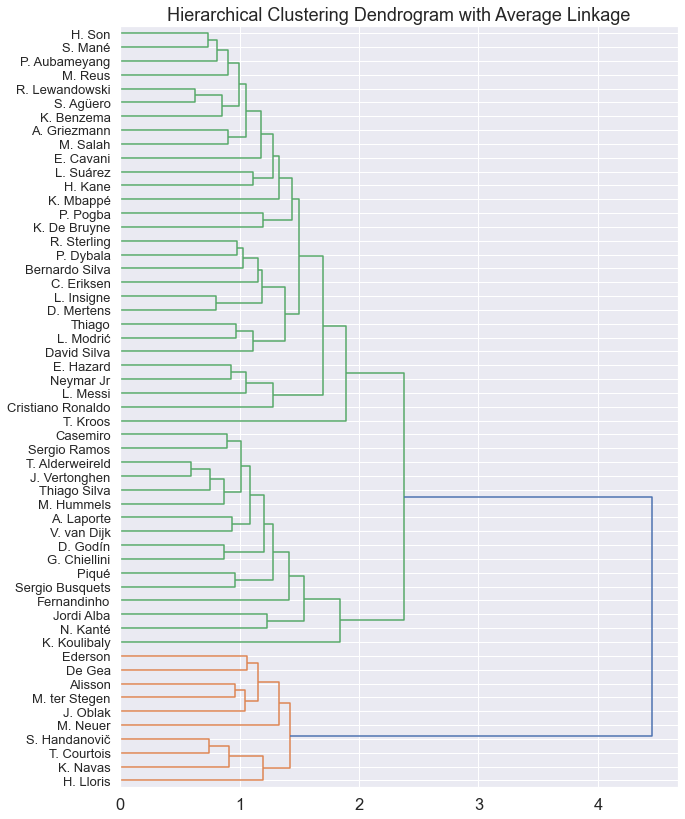

In [48]:
# plot dendrogram using average linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')
dendrogram = shc.dendrogram(shc.linkage(X_hc, method="average"), labels= names, leaf_font_size = 13, orientation='right')

In [49]:
# Single linkage

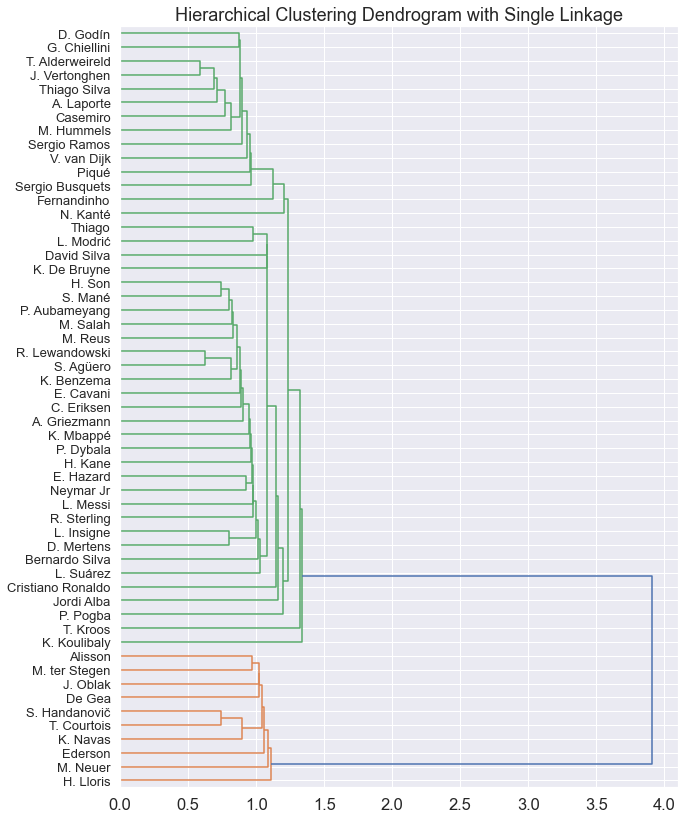

In [50]:
#plot dendrogram using single linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Single Linkage')
dendrogram = shc.dendrogram(shc.linkage(X_hc, method="single"), labels= names, leaf_font_size = 13, orientation='right')

The players are grouped into two main positions Goalies vs rest of the players

In [51]:
## Centroid linkage

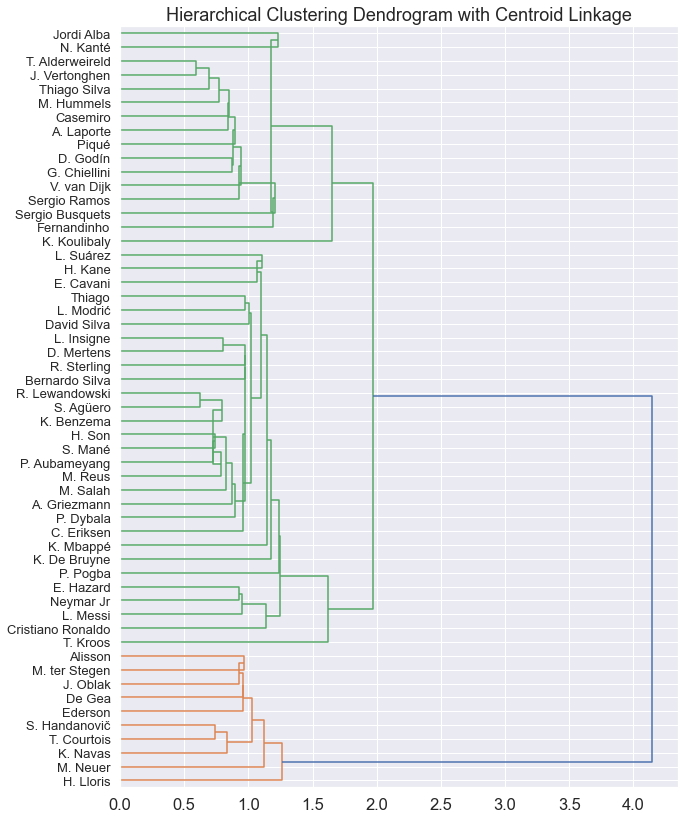

In [52]:
# plot dendrogram using centroid linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Centroid Linkage')
dendrogram = shc.dendrogram(shc.linkage(X_hc, method="centroid"), labels= names, leaf_font_size = 13, orientation='right')


again, grouped into goalies vs the rest

In [53]:
##Complete linkage

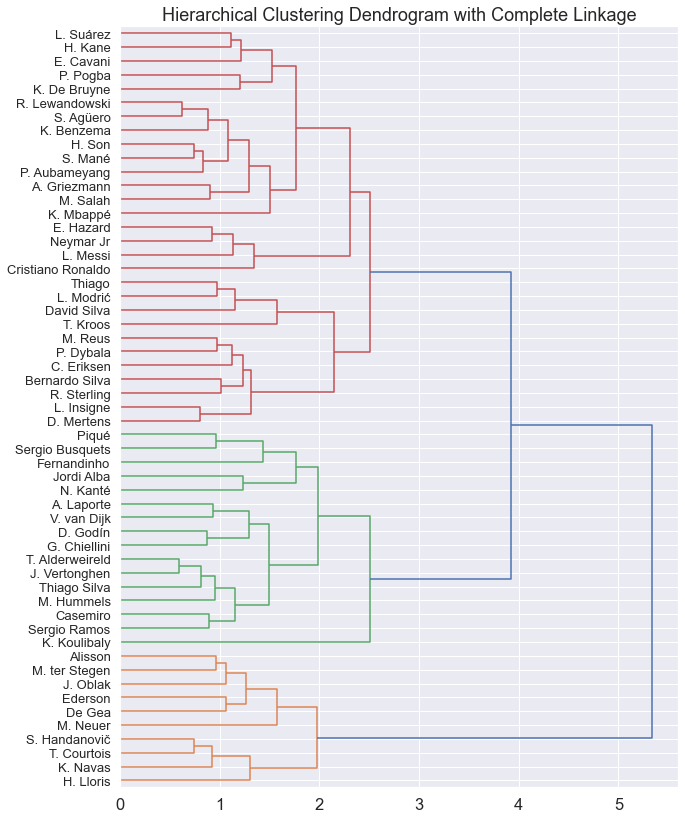

In [54]:
# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')
dendrogram = shc.dendrogram(shc.linkage(X_hc, method="complete"), labels= names, leaf_font_size = 13, orientation='right')

Note:Complete linkage seems to group players most accurately
green=defenders
orange=goalies
Red=Forward(LW,RW,SR)

#### DB Scan
Density-Based Spatial Clustering of Applications with Noise
Density-based clustering locates regions of high density that are separated from one another by regions of low density
Density: number of points within a specified radius (aka. Eps or ε)



In [55]:
from sklearn.cluster import DBSCAN

In [56]:
db=DBSCAN(eps=1,min_samples=5)
db_clusters=db.fit_predict(X4)

In [57]:
pca_df2["cluster"] = clusters
pca_df2['name'] = X3["short_name"]


pca_df2.columns = ['x','y','cluster','name']
pca_df2.head()

,x,y,cluster,name
0,-0.957090,-1.143506,1,L. Messi
1,-0.857431,-1.054762,1,Cristiano Ronaldo
2,-0.853749,-1.275781,1,Neymar Jr
3,2.949434,-0.315477,2,J. Oblak
4,-0.773074,-1.079435,1,E. Hazard


**Finding an optimal epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results.


In [58]:
from sklearn.neighbors import NearestNeighbors

In [59]:
nn=NearestNeighbors(n_neighbors=2)
ep_nb=nn.fit(X4)
distances, indices=ep_nb.kneighbors(X4)

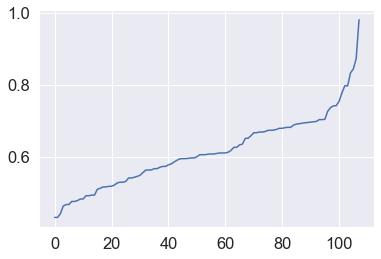

In [60]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

Note: The curvature seems to pick up from 0.8

In [61]:
#creating clusters using optimal epsilon and min_samples
db=db=DBSCAN(eps=0.8,min_samples=2)
db_df = pd.DataFrame(pca.fit_transform(X4))
db_clusters=db.fit_predict(X4)
pca_df2["cluster"] = clusters
pca_df2['name'] = X3["short_name"]


pca_df2.columns = ['x','y','cluster','name']
pca_df2.head()

,x,y,cluster,name
0,-0.957090,-1.143506,1,L. Messi
1,-0.857431,-1.054762,1,Cristiano Ronaldo
2,-0.853749,-1.275781,1,Neymar Jr
3,2.949434,-0.315477,2,J. Oblak
4,-0.773074,-1.079435,1,E. Hazard


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1080 with 0 Axes>

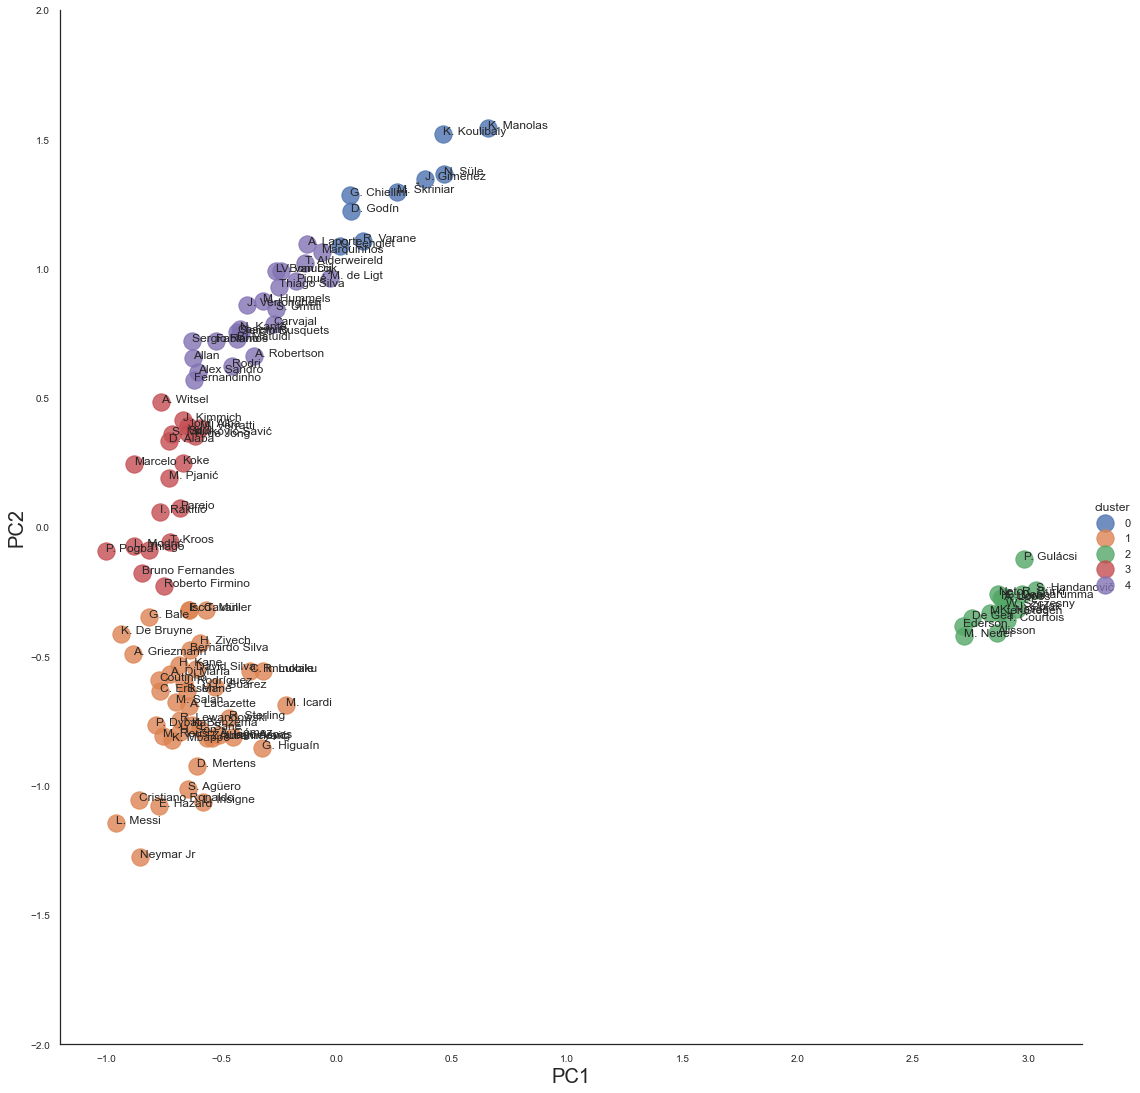

In [62]:
#plot
plt.figure(figsize=[20,15])
sns.set(style='white')
ax=sns.lmplot(x='x',y='y', hue='cluster', data=pca_df2, 
               legend=True,fit_reg=False,size=15,scatter_kws={'s':300})
texts=[]
for x,y,s in zip(pca_df2.x,pca_df2.y,pca_df2.name):
    texts.append(plt.text(x,y,s))
    
ax.set(ylim=(-2,2))
plt.tick_params(labelsize=10)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.show()


Note:Red=midfielders,orange=forward,purple, blue=defenders,green= goalies.

In [63]:
#DB Scan evaluation

print("DB Scan Silhouette Score:",silhouette_score(db_df, labels).round(3))

DB Scan Silhouette Score: 0.599


#### Conclusion:

In this project we have compared three clustering models for the dataset FIFA20, they are Kmeans algorithm, Heirarchical clustering and DB Scan, here are the following obervations from the three models.

**1.Kmeans:Initially when KMeans was perfomed on the entire dataset the Silhouette Score was 0.458,after cleaning the data of unnecessary features the Silhouette Score improved to 0.599, Principal component analysis was perfomed on the main dataset for better peformance and the transformed data was fed to the Kmeans algorithm,a noticable difference appeared in the visualization of the PCA projections on the dataset which included all the features and the dataset with selected features, the later showed good clustering of players.

**2.Heirarchical clustering:For better visualization purpose players with overall >86 are taken into consideration, the goal was to segregate the players into a tree-like plot by clearly distinguishing players down to their postions,different types of linkages were performed to check which likage grouped the players best by finding the correlation among observations,Complete linkage (furthest-neighbor method),Single linkage (nearest-neighbor method),Average linkage,Centroid linkage, Complete linkage seems to perform best this inference was made by visualizing the dendrogram.

**3.DB Scan:By finding optimal episilon and the min_samples the clusters are distributed based on their density, the Silhouette Score for DB Scan was 0.599 which is similar to KMeans, the visualization is similar to Kmeans PCA projection as well.

To conclude we belive Heirachical clustering performed better than Kmeans and DBScan because although the clustering was done its hard to clearly identify which player falls into which position and skill set,but Heirarchical clustering sgregated the players better by grouping the players with similar skillsets into different nodes. 